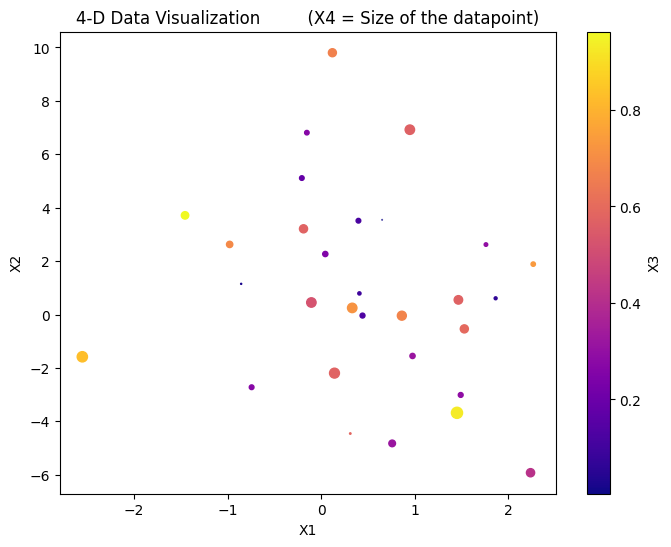

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

#Random seed for reproducibility

np.random.seed(0)

#Sampling the data

n_samples = 30
x1 = norm.rvs(loc=0, scale=1, size=n_samples)
x2 = norm.rvs(loc=2, scale=4, size=n_samples)
x3 = uniform.rvs(loc=0, scale=1, size=n_samples)
z = uniform.rvs(loc=0, scale=1, size=n_samples)
x4 = x3 * z

#Scatter plot

fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection = "3d")
plt.scatter(x1, x2, c=x3, s=x4 * 100, cmap="plasma", alpha=1)

#Adding labels and colorbar
plt.xlabel("X1")
plt.ylabel("X2")
cbar = plt.colorbar()
cbar.set_label("X3")
plt.title("4-D Data Visualization         (X4 = Size of the datapoint)")
plt.show()

x1 and x2 come from diff normal distributions. We can observe two separate clusters indicating that x1 and x2 are distinct but related dimensions

x3 is uniformly distributed between 0 and 1. It does not show a strong correlation with x1. The points are spread uniformly in the x1-x3 space, reflecting their independence

x4 is derived from x3, and its value is influenced by the uniform distribution of x3. This results in a scattered plot without a strong linear relationship. You can see that the points dont follow a clear pattern concerning x2 and x4

The size of each data point in the scatter plot corresponds to the value of x4, meaning that larger or smaller data points indicate higher or lower values of x4

The color of each point is determined by x3. Therefore, points with similar colors(from the same x3 range) tend to cluster together

The plot highlights the interplay between these dimmensions, where x1 and x2 are separate clusters, x3 affects the color grouping, and x4 is somewhat scattered, influenced by x3. this visualization allows us to see how the different dimensions relate to each other in a 4-D space


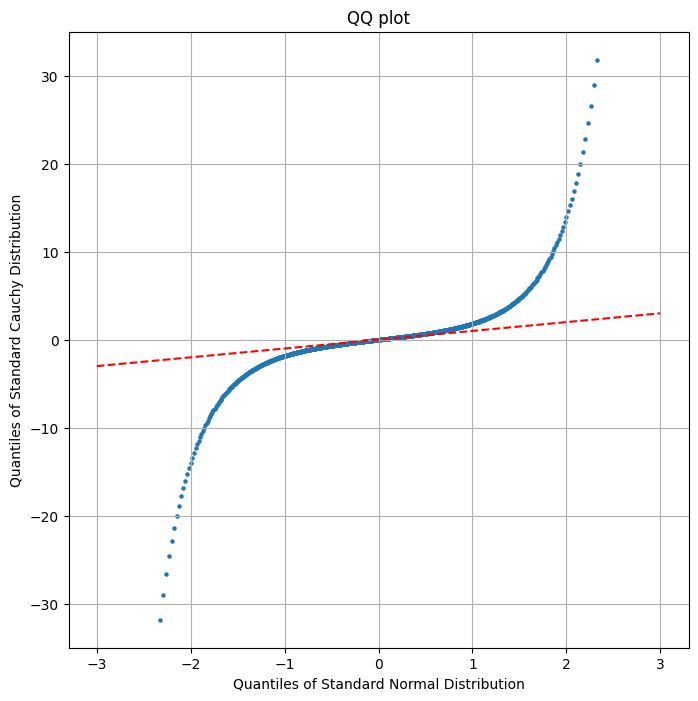

In [20]:
from scipy.stats import cauchy

#Taking 1000 samples for normal and cauchy distribution
n_samples = 1000

#Calculating quantiles for normal and cauchy distribution

normal_quantiles = norm.ppf(np.linspace(0.01, 0.99, n_samples))
cauchy_quantiles = cauchy.ppf(np.linspace(0.01, 0.99, n_samples))

#Creating the QQ plot

plt.figure(figsize=(8,8))
plt.scatter(normal_quantiles, cauchy_quantiles, s=5)
plt.plot([-3,3], [-3,3], color='red', linestyle='--')
plt.xlabel("Quantiles of Standard Normal Distribution")
plt.ylabel("Quantiles of Standard Cauchy Distribution")
plt.title("QQ plot")
plt.grid()
plt.show()

Here's what the QQ plot illustrates:
In the center of the plot, where points align along a diagonal line, it shows similarity in the central portions of the distributions

As we move away from the center, the points diverge from the diagonal line. For the standard normal distribution, the deviation is slight, indicating less extreme values in the tails

However, forr the standard cauchy distribution, the points deviate significantly, showing much heavier tails with a higher likelihood of extreme values

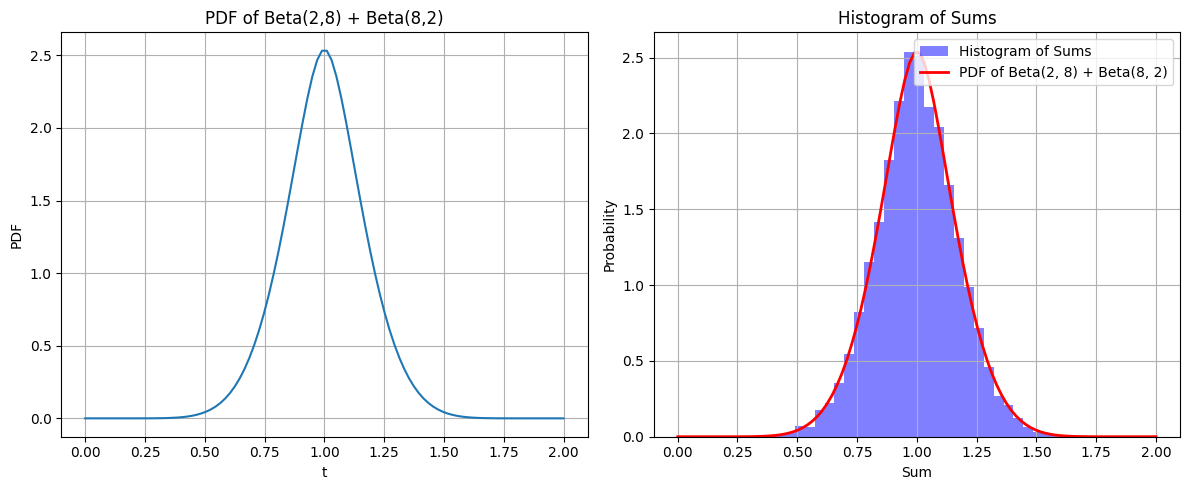

In [21]:
from scipy.stats import beta
from scipy.integrate import quad

# beta parameters

beta_parameter1 = (2,8)
beta_parameter2 = (8,2)

#PDF's of Beta(2,8) and Beta(8,2)

def pdf_beta(x, beta_parameter):
  return beta.pdf(x, *beta_parameter)


#Function for f1(x) * f2(t-x)

def integrand(x, t):
  return pdf_beta(x, beta_parameter1) * pdf_beta(t - x, beta_parameter2)

#100 points in support of beta(2,8) + beta(8,2)

t_values = np.linspace(0, 2, 100)

#PDF values for the sum using quad

pdf_values = []
for t in t_values:
  result, _ = quad(integrand, 0, 2, args=(t,))
  pdf_values.append(result)

#10,000 samples from beta(2,8) and beta(8,2), adding and plotting the histogram

samples_beta1 = beta.rvs(*beta_parameter1, size=10000)
samples_beta2 = beta.rvs(*beta_parameter2, size=10000)
sum_of_samples = samples_beta1 + samples_beta2

#Plotting the results

plt.figure(figsize=(12,5))

#Plotting the PDF values

plt.subplot(1,2,1)
plt.plot(t_values, pdf_values, label="PDF of Beta(2,8) + Beta(8,2)")
plt.xlabel("t")
plt.ylabel("PDF")
plt.title("PDF of Beta(2,8) + Beta(8,2)")
plt.grid()


#Plotting the histogram of sampled data

plt.subplot(1,2,2)
plt.hist(sum_of_samples, bins=30, density=True, alpha=0.5, color = "b", label="Histogram of Sums")
plt.plot(t_values, pdf_values, "r", linewidth=2, label="PDF of Beta(2, 8) + Beta(8, 2)")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.title("Histogram of Sums")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In the case of Beta distributions, the support is typically from 0 to 1

For Beta(2,8): The support is from 0 to 1, as is typical for all Beta distributions.
For Beta(8,2): The support is also from 0 to 1
For Beta(2,8)+Beta(8,2): The support of the resulting distribution will still be from 0 to 2
[In reference to slide 39, lecture 4]

Regarding the observations from code:
The first plot shows the PDF of Beta(2,8)+Beta(8,2). It's a unimodal distribution with a peak within the [0,2] range, which is the expected support

The second plot displays the histogram of the sums of 10000 samples from Beta(2,8) and Beta(8,2).It aligns well with the PDF values. So this suggests that the histogram represents the distribution of the sums accurately





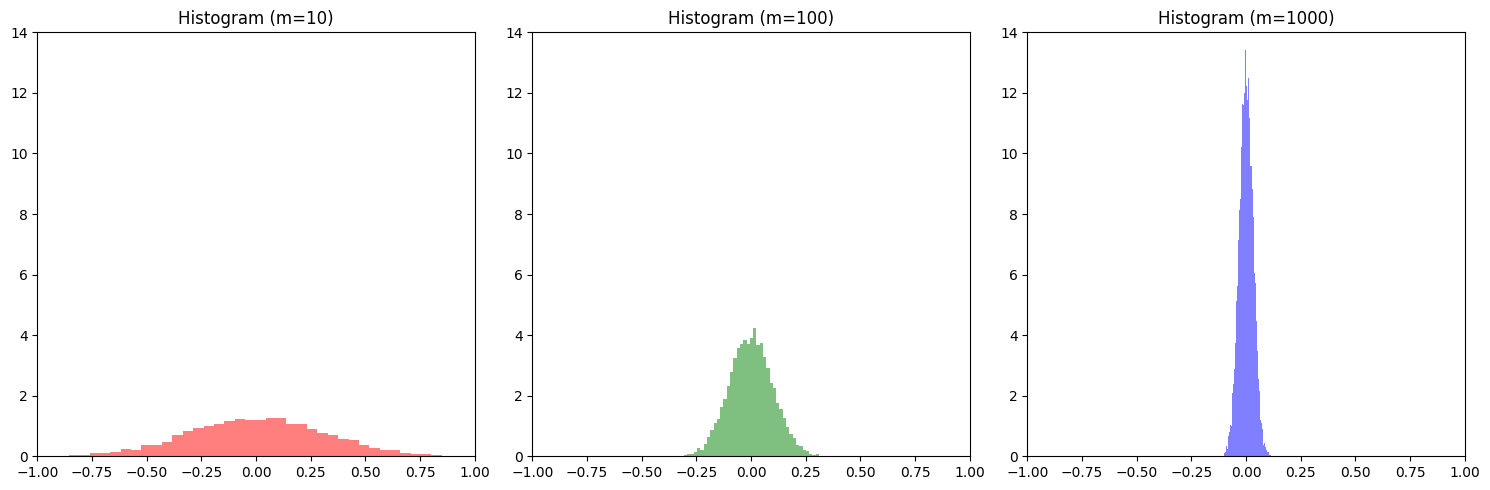

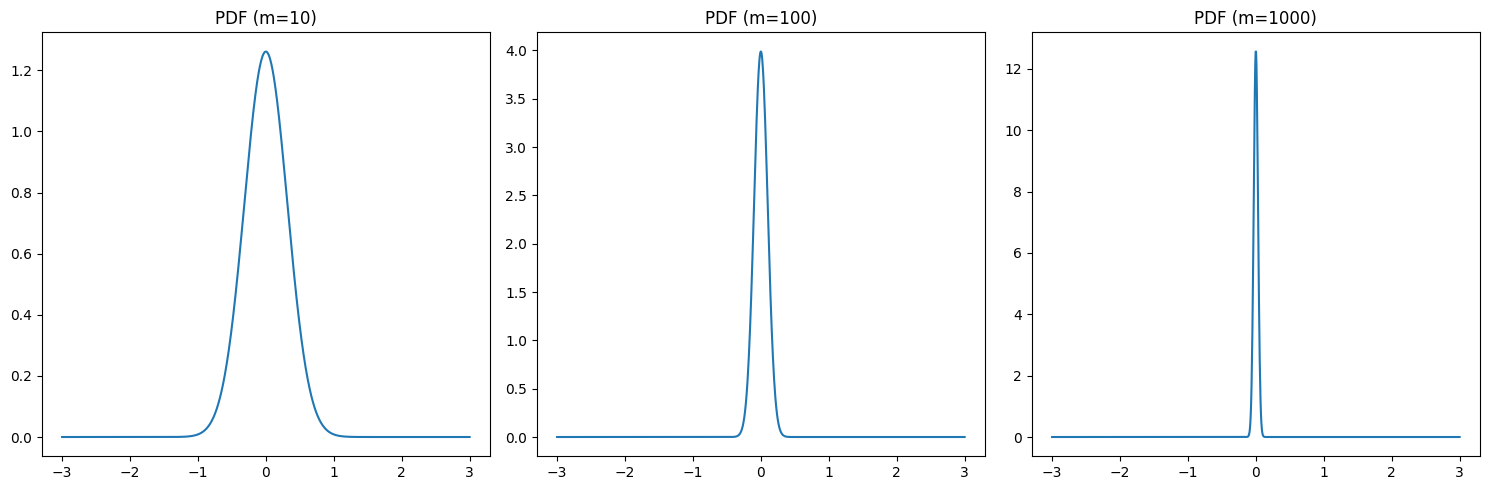

In [28]:
#Fucntion to create sample means from the standard normal distribution

def sample_mean(m, n):
  samples = np.random.normal(0, 1, (n, m))
  sample_means = np.mean(samples, axis=1)
  return sample_means

#Generating sample means for different values of m

sample_means_m10 = sample_mean(10,10000)
sample_means_m100 = sample_mean(100, 10000)
sample_means_m1000 = sample_mean(1000, 10000)

#Plotting histograms for the sample means

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1,)
plt.xlim(-1, 1)
plt.ylim(0,14)

plt.hist(sample_means_m10, bins = 50, density = True, alpha = 0.5, color = 'r')
plt.title('Histogram (m=10)')
plt.subplot(1,3,2)
plt.xlim(-1, 1)
plt.ylim(0,14)

plt.hist(sample_means_m100, bins = 50, density = True, alpha = 0.5, color = 'g')
plt.title('Histogram (m=100)')
plt.subplot(1,3,3)
plt.xlim(-1, 1)
plt.ylim(0, 14)

plt.hist(sample_means_m1000, bins = 50, density = True, alpha = 0.5, color = 'b')
plt.title('Histogram (m=1000)')
plt.tight_layout()


#Class for sample mean distribution

class sample_mean_distribution:
  def __init__(self, m):
    self.m = m

  def pdf(self, x):
      if self.m <= 0:
        return 0
      return norm.pdf(x, loc=0, scale=1 / np.sqrt(self.m))

#Instantiate sample_mean_dist objects

dist_m10 = sample_mean_distribution(10)
dist_m100 = sample_mean_distribution(100)
dist_m1000 = sample_mean_distribution(1000)

#Generate values for PDFs

x = np.linspace(-3,3,1000)
pdf_m10 = [dist_m10.pdf(val) for val in x]
pdf_m100 = [dist_m100.pdf(val) for val in x]
pdf_m1000 = [dist_m1000.pdf(val) for val in x]


#Plot PDFs of sample mean distributions

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(x, pdf_m10, label ='PDF')
plt.title('PDF (m=10)')
plt.subplot(1,3,2)
plt.plot(x, pdf_m100, label='PDF')
plt.title('PDF (m=100)')
plt.subplot(1,3,3)
plt.plot(x, pdf_m1000, label ='PDF')
plt.title('PDF (m=1000)')

plt.tight_layout()
plt.show()

a) The histograms show the distributiion of sample means for different values of m. As m increases, the sample means tend to follow a normal distribution becoming more concentrated around the true mean (0)

b) The PDFs allso illustrate the distribution of sample means, showing that as m increases the distribution becomes narrower and more closely resembles a normal distribution

c) Comparing the histograms with the PDFs we can observe that as m increases, the histogram of sample means aligns more closely with the PDF indicating that the sample means are more normally distributed.
This aligns with the Central Limit THeorem, which states that as the ssample size increases, the distribution of the sample mean approaches a normal distribution